# Assignment-Time Series Analysis
Due on Oct. 24th

Please retrieve daily closing stock price of AT&T using `yahoo finance`. Then, do the following tasks:
    
Question 1. Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data. (20 pts)

Question 2. Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary.(20 pts)

Question 3. If the series is not stationary, please make it stationary.(20 pts)

Question 4. Model the series using moving average and autoregressive model with an optimum lag.(20 pts)

Questions 5. Visualize the result using train, test data and forecast in a single plot and calculate the predictive performance using RMSE metric.(20 pts)

In [91]:
# codes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [92]:
stock = 'T'
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,8,1)
AT_close = yf.download(stock, start = start, end=end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 completed


#### Question 1. Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data. (20 pts)

In [93]:
AT_close.head(10)

Date
2021-01-04    22.235649
2021-01-05    22.099697
2021-01-06    22.530210
2021-01-07    22.590633
2021-01-08    21.918428
2021-01-11    21.805136
2021-01-12    21.714502
2021-01-13    21.608761
2021-01-14    22.122356
2021-01-15    22.031721
Name: Close, dtype: float64

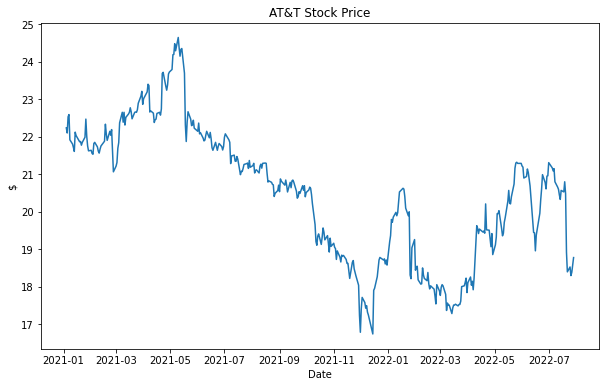

In [94]:
plt.plot(AT_close)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AT&T Stock Price')
plt.show()

from the above line chart of AT&T closing price,it is observed that initially it has positive trend and later it has downward trend in 2021 and it has almost positive trend in 2022.

In [95]:
AT_close.describe()

count    396.000000
mean      20.469390
std        1.770492
min       16.744713
25%       18.959425
50%       20.692432
75%       21.825906
max       24.645016
Name: Close, dtype: float64

From statistical analysis it is observed that the mean of the AT&T closing price is 20.5,min and max stock prices are 16.75 and 24.65 repectively in the considered period.

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose

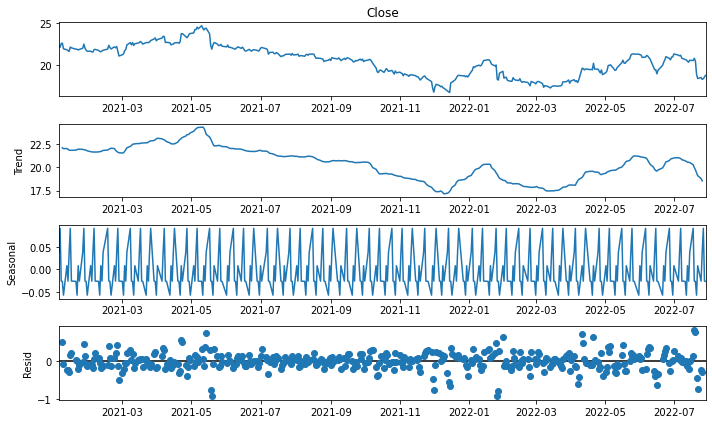

In [97]:
decomposition = seasonal_decompose(AT_close, model='additive', period=7)
decomposition.plot()
plt.show()


first graphs gives overall behaviour of data.it indicates it has almost negative trend.

second graph gives trend of the data. Trend shows the overall movement of a time series. We can say that there exist a trend if there is a long-term increase or decrease in the data. so we can see that there is longterm decrease in the data.

Seasonality is the third plot which shows periodical ups and downs in the data. If there is a seasonality in the data, it should also be removed. from above graph we cannot come to any conclusion.

The last graph show the residuals. This is obtained after removing the trend and seasonal components from the time series. If residual are stable, it means that our data is stationary structure.  At first glance, the volatile distribution of the residual indicates that the data is not stationary.

#### Question 2. Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary.(20 pts)

### Statistical Test for detecting stationarity: ADF

In [98]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(AT_close)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -1.7157887570642285 and p-value is 0.4229965426186889


p value is 0.422.It indicates that the time series is non-stationary as it is higher than 0.05.

### Autocorrelation Function (ACF)

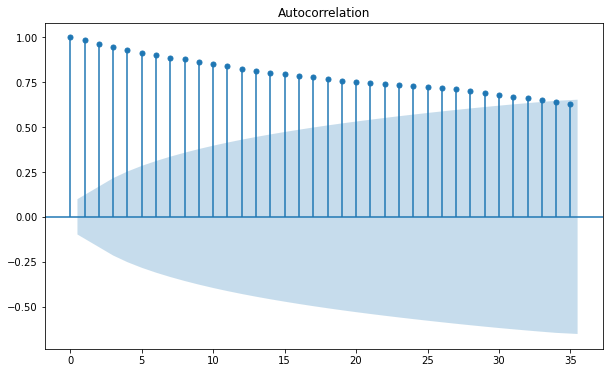

In [99]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(AT_close, lags=35);

The above acf plot indicates that acf is slowly decaying, which is an indicator of non-stationarity.

### Partial Autocorrelation Function (PACF)

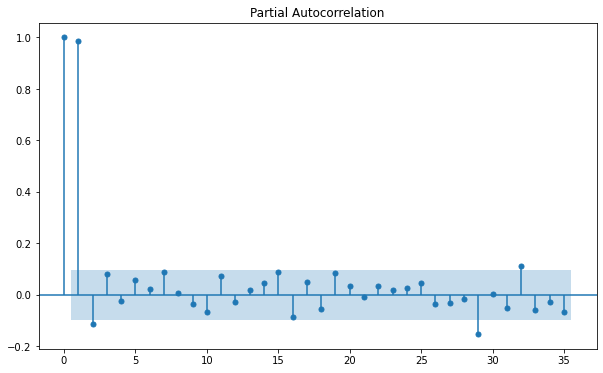

In [100]:
sm.graphics.tsa.plot_pacf(AT_close, lags=35);

the above pacf plot which indicates that  there are high lags at 0 and 1 and there some lags which are significantly non-zero(not in the confidence interval) which indicates that it is not stationary. 

#### Question 3. If the series is not stationary, please make it stationary.(20 pts)

In [101]:
AT_diff = AT_close.diff().dropna()
AT_diff

Date
2021-01-05   -0.135952
2021-01-06    0.430513
2021-01-07    0.060423
2021-01-08   -0.672205
2021-01-11   -0.113293
                ...   
2022-07-25    0.130001
2022-07-26   -0.230001
2022-07-27    0.090000
2022-07-28    0.190001
2022-07-29    0.200001
Name: Close, Length: 395, dtype: float64

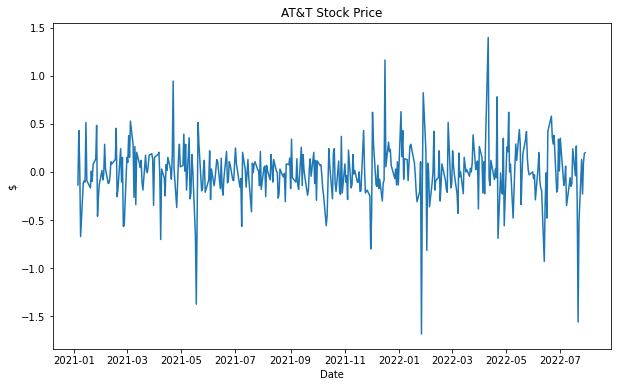

In [102]:
plt.plot(AT_diff)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AT&T Stock Price')
plt.show()

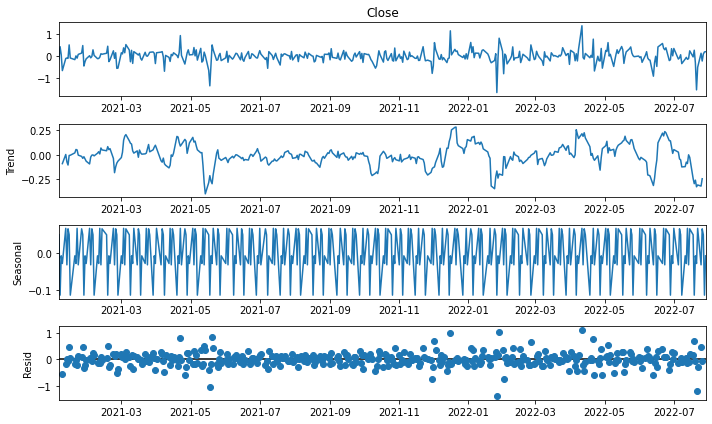

In [103]:
decomposition = seasonal_decompose(AT_diff, model='additive', period=7)
decomposition.plot()
plt.show()

In [104]:
stat_test = adfuller(AT_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -14.953108483675345 and p-value is 1.2717011397742531e-27


by considering the difference of the stocks and performing the ADF test the p value obtained it approximatley equal to zero and from the residual plot most of the dots are in same line, which indicates that it is stationary.

#### Question 4. Model the series using moving average and autoregressive model with an optimum lag.(20 pts)
#### Questions 5. Visualize the result using train, test data and forecast in a single plot and calculate the predictive performance using RMSE metric.(20 pts)

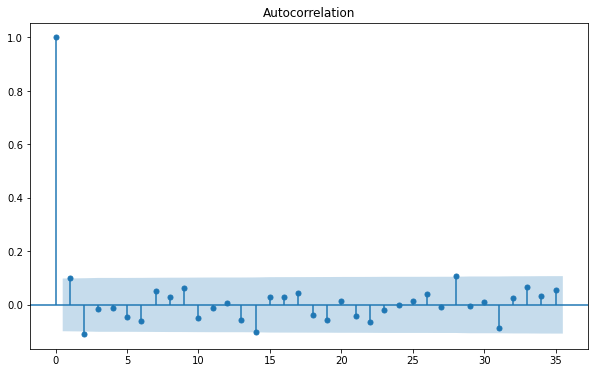

In [105]:
sm.graphics.tsa.plot_acf(AT_diff, lags=35);

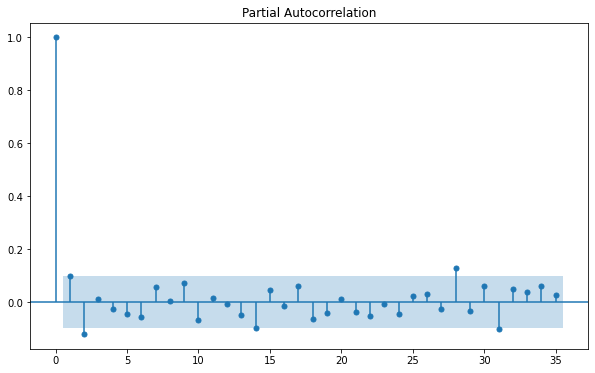

In [106]:
sm.graphics.tsa.plot_pacf(AT_diff, lags=35);

From the above acf and pacf plots it is observed that there are lags at 1,2,14,28.for better results i am considering the larger window,so i am choosing optimum lag as 14th lag

### Moving Average

In [107]:
from statsmodels.tsa.arima.model import ARIMA

In [108]:
train_len = int(len(AT_diff) * 0.8)
diff_train = AT_diff[:train_len]
diff_test = AT_diff[train_len:]

In [109]:
start = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

In [110]:
ma_model = ARIMA(diff_train, order=(0, 0, 14))
ma_result = ma_model.fit()

In [111]:
ma_pred = ma_result.predict(start, end)
ma_pred.index = diff_test.index

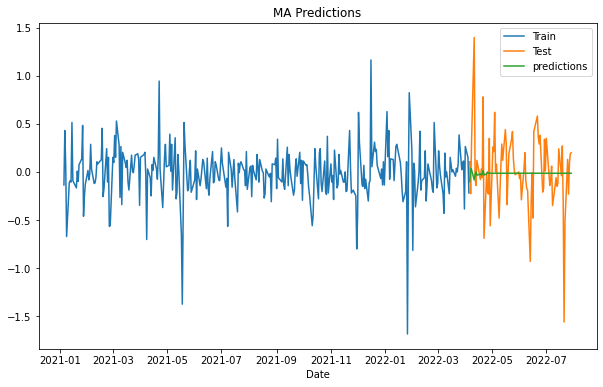

In [112]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ma_pred.index , ma_pred, label='predictions')
plt.title('MA Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [114]:
mae_ma = mean_absolute_error(diff_test, ma_pred)
mse_ma = mean_squared_error(diff_test, ma_pred)
rmse_ma = np.sqrt(mean_squared_error(diff_test, ma_pred))

In [115]:
ma_perf = {'mae_ma': mae_ma,
             'mse_ma':mse_ma,
             'rmse_ma':rmse_ma}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_ma,mse_ma,rmse_ma
0,0.264922,0.145428,0.38135



The RMSE value obtained using Moving Average model is 0.381.,which is very near to zero which indicates that the moving average model is best fit for forecasting the data.

running the 10 step forecasting analysis

In [116]:
ma_model = ARIMA(AT_diff, order=(0, 0, 14))
ma_result = ma_model.fit()

In [117]:
forecast_index = pd.date_range(diff_test.index[-1], periods=10)

In [118]:
ma_forecast = ma_result.forecast(steps=10)
ma_forecast.index = forecast_index

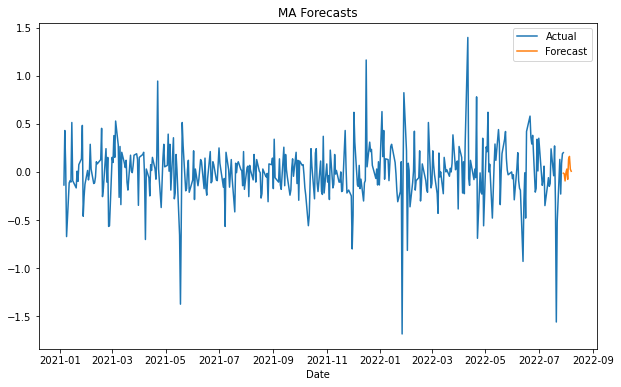

In [119]:
plt.plot(AT_diff.index, AT_diff, label='Actual')
plt.plot(ma_forecast.index, ma_forecast, label='Forecast')
plt.legend()
plt.title('MA Forecasts')
plt.xlabel('Date')
plt.show()

### Autoregressive Model

In [120]:
ar_model = ARIMA(diff_train, order=(14, 0, 0))
ar_result = ar_model.fit()

In [121]:
ar_pred = ar_result.predict(start, end)
ar_pred.index = diff_test.index

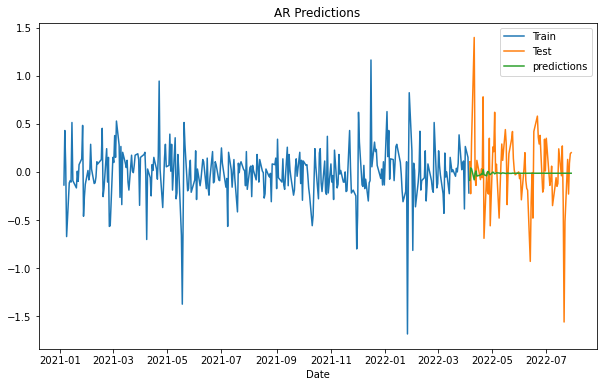

In [122]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ar_pred.index , ar_pred, label='predictions')
plt.title('AR Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [123]:
mae_ar = mean_absolute_error(diff_test, ar_pred)
mse_ar = mean_squared_error(diff_test, ar_pred)
rmse_ar = np.sqrt(mean_squared_error(diff_test, ar_pred))

In [124]:
ar_perf = {'mae_ar': mae_ar,
             'mse_ar':mse_ar,
             'rmse_ar':rmse_ar}
ar_perf = pd.DataFrame([ar_perf])
ar_perf

,mae_ar,mse_ar,rmse_ar
0,0.264978,0.145216,0.381072


The RMSE value obtained using Moving Average model is 0.381072.,which is very near to zero which indicates that the autoregressive model is best fit for forecasting the data.

comparing the RMSE value of moving average and autoregressive models,AR model has lower RMSE.So AR model fits the best for optimum prediction of the data.

Running the 10 step forecasting analysis

In [125]:
ar_model = ARIMA(AT_diff, order=(14, 0, 0))
ar_result = ar_model.fit()

In [126]:
ar_forecast = ar_result.forecast(steps=10)
ar_forecast.index = forecast_index

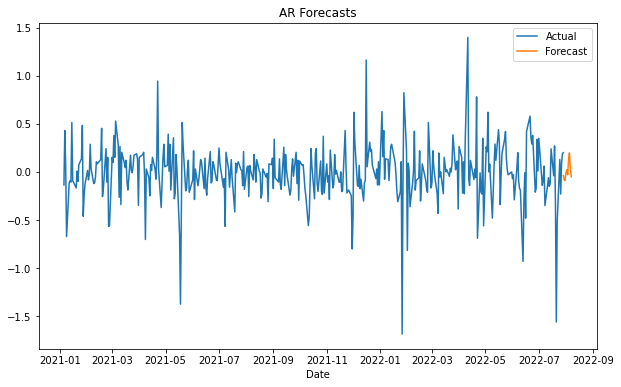

In [127]:
plt.plot(AT_diff.index, AT_diff, label='Actual')
plt.plot(ar_forecast.index, ar_forecast, label='Forecast')
plt.legend()
plt.title('AR Forecasts')
plt.xlabel('Date')
plt.show()

From the above graphs of MA forecasts and AR forecasts it is observed that the predictions are approximately similar.